# Here are some steps I think we can use 
### Check centering and scaling video die laaste deel

1 missing values </br>
2 Dummy values </br>
3 Create a Pipeline with steps </br>
4 Paramenters where we change the values of the things in the steps (like knn n_neigbors)</br>
5 X_train y_train etc split </br>
6 GridSearchCV (pipeline, param_grid)</br>
7 cv.fit (X_train, y_train)</br>
8 y_pred = cv.predict(X_test)</br>
9 Evaluate the predictions </br>
10 Go back and chnage our (Scaler or Normalizer, Regression model, split for the data,  parameter or remove certain colomns </br>
11 Start again ar step 3</br>

#### Types of regressions we can use
Logistic Regression </br>
Naive Bayes</br>
K-Nearest Neighbors</br>
Decision Tree</br>
Support Vector Machines</br>
Random Forest </br>
Stochastic Gradient Descent</br>
Here is a website with all 7 their advantages, disadvantages and python code https://analyticsindiamag.com/7-types-classification-algorithms/ </br>
Op die website het hulle n table wat al die regressions uit een le en hoe akkuraat dit was, Ek dink ons kan mik om ook iets soos dit om te stel, gaan check ook asb die power point template uit en laat weet wat jy dink </br>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import sys
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice


In [2]:
data = pd.read_csv("SalesDirect.csv")

In [3]:
data

,Sales,Purchase,Month,AgeInMonths,ProfileInMonths,Subscribed,NumPrevOrders,AvgSpend,POSR,OPR,...,ShippingOption,Shipping,Country,Platform,Payment,DayOfWeek,Ad_1,Ad_2,Ad_3,SocialMedia
0,519.91,Yes,November,450,22,None,32,159.04,1.3,0.60,...,Express,Paid,Germany,Computer,PayPal,Saturday,No,No,No,None
1,620.48,Yes,April,511,29,None,22,358.26,6.5,0.95,...,Premium,Paid,South Africa,Computer,EFT,Monday,No,No,Yes,None
2,545.22,Yes,July,410,28,None,31,351.28,3.1,0.98,...,Premium,Paid,China,Computer,EFT,Sunday,No,No,Yes,None
3,438.87,Yes,September,451,1,None,9,255.13,2.6,0.77,...,Express,Paid,China,Computer,Credit Card,Wednesday,No,No,Yes,None
4,0.00,No,January,402,7,None,8,262.69,4.8,0.61,...,NaN,NaN,South Africa,Android,NaN,Wednesday,Yes,No,No,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,507.73,Yes,March,434,20,Daily,14,252.58,7.4,0.95,...,Premium,Paid,South Africa,iOS,Account Credit,Saturday,Yes,Yes,No,Twitter
149996,465.05,Yes,March,404,7,None,9,442.57,3.1,0.85,...,Express,Paid,United States,Computer,PayPal,Thursday,Yes,No,Yes,Twitter
149997,530.91,Yes,June,411,31,Monthly,27,168.55,5.4,0.50,...,Standard,Free,South Africa,Computer,Credit Card,Friday,Yes,Yes,Yes,Instagram
149998,0.00,No,February,510,16,None,9,339.60,0.8,0.88,...,NaN,NaN,South Africa,iOS,NaN,Sunday,No,No,Yes,None


In [4]:
import os
os.listdir()

['.~lock.DataScienceTemplate.pptx#',
 'SalesDirect.csv',
 'DataScienceTemplate.pptx',
 '.ipynb_checkpoints',
 'RepoTest.txt',
 'DataScienceFAS.ipynb',
 '.git']

In [5]:
data.shape


(150000, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sales            150000 non-null  float64
 1   Purchase         150000 non-null  object 
 2   Month            150000 non-null  object 
 3   AgeInMonths      150000 non-null  int64  
 4   ProfileInMonths  150000 non-null  int64  
 5   Subscribed       150000 non-null  object 
 6   NumPrevOrders    150000 non-null  int64  
 7   AvgSpend         150000 non-null  float64
 8   POSR             150000 non-null  float64
 9   OPR              150000 non-null  float64
 10  Online           150000 non-null  int64  
 11  Discount         91464 non-null   float64
 12  ShippingOption   91464 non-null   object 
 13  Shipping         91464 non-null   object 
 14  Country          150000 non-null  object 
 15  Platform         150000 non-null  object 
 16  Payment          91464 non-null   obje

In [7]:
data.isna().sum()

Sales                  0
Purchase               0
Month                  0
AgeInMonths            0
ProfileInMonths        0
Subscribed             0
NumPrevOrders          0
AvgSpend               0
POSR                   0
OPR                    0
Online                 0
Discount           58536
ShippingOption     58536
Shipping           58536
Country                0
Platform               0
Payment            58536
DayOfWeek              0
Ad_1                   0
Ad_2                   0
Ad_3                   0
SocialMedia            0
dtype: int64

 Thus, our data is importet correctly and we can go ahead and start familiarizing ourselves with the data


# Firstly, we notice that there are null values. 
#### We first have to get rid of these values and replace them with some other value so that we can actually perform regressions and interpret the data

We will try multiple ways of replacing the data and see which is the most effective

In [8]:
df_with_null = data[["Discount","ShippingOption", "Shipping", "Payment"]]
df_all_null = df_with_null.isnull()
df_all_null

,Discount,ShippingOption,Shipping,Payment
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,True,True,True,True
...,...,...,...,...
149995,False,False,False,False
149996,False,False,False,False
149997,False,False,False,False
149998,True,True,True,True


In [9]:
condi = df_all_null['Discount'].values == True
df_all_null  = df_all_null[condi]
any_false = df_all_null['ShippingOption'].values == False
any_ShipOp = df_all_null[any_false]
any_false = df_all_null['Shipping'].values == False
any_Ship = df_all_null[any_false]
any_false = df_all_null['Payment'].values == False
any_Pay = df_all_null[any_false]

In [10]:
any_ShipOp

,Discount,ShippingOption,Shipping,Payment


In [11]:
any_Ship

,Discount,ShippingOption,Shipping,Payment


In [12]:
any_Pay

,Discount,ShippingOption,Shipping,Payment


# This changes our approach to the missing values

What we just showed is that all of the missing values occur in the same rows. Meaning that is Discount is missing then ShippingOption	Shipping	Payment is also missing. Hence this might be for some reason (like the website did not track the data yet or not). It might be worth it to investigate why this is.

In [13]:
df_is_null = data[data.isna().any(axis=1)]
a = df_is_null['Sales'].sum() 
a

0.0

# We found the problem

It is not that the values weren't recorded, the values do not exist since there was not any Sales made for these clients. Thus those values can not possible exist. This means that we can change all of the NaN to some value indicating that a sale has not yet taken place

# Hoef nie iets te doen vir alles behalwe discount (die res moet een wees) 

Met die dummie values, as hy nie eeen van dit is nie dan weet ons dat dit is none en dat nn sale het nie gebeur nie, dus is dit onnodig om nog n column te add </br>
Kan maybe ook al die values remove wat net gevat work by die point of sale, maar ek dink nie dis n goeie idee nie


## /What we can do is the following
We defined discount as the discount offered to a user and nie wat hull gekry het nie dus selfs al koop hy niks maar hy sit it's in sy basket dan word hy n discount aangebied, dus moet ons die discount value met oiets vervang, Dit kan maybe een van ons goed wees wat ons uit probeer om te verander en kyk of dit dit enigsins meer of minder akkuraat maak. </br>

Since discount is only for the basket and the sale itself doesn't matter we can drop some tables to do this

In [14]:
df_discount = data.drop(columns=['Sales', 'ShippingOption','Shipping', 'Payment'])
df_discount.DayOfWeek.replace(('Monday', 'Tuesday' ,'Wednesday','Thursday','Friday','Saturday','Sunday'), (0, 1, 2, 3, 4, 5, 6), inplace=True)
df_discount.Month.replace(('July', 'December', 'January','September','November','March','April','June','February','October', 'May', 'August'), (6, 11, 0, 8, 10, 2, 3, 5, 1, 9, 4, 7), inplace=True)
df_discount.Country.replace(('South Africa', 'England','Japan', 'China', 'Belgium','Ireland','Egypt', 'India','Germany', 'Kenya','Netherlands','United States','Italy','Brazil' ), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), inplace=True)
df_discount.Platform.replace(('Computer', 'iOS', 'Android'), (0, 1, 2), inplace=True)
df_discount.Subscribed.replace(('None', 'Monthly', 'Weekly', 'Daily'), (0, 1, 2, 3), inplace=True)
df_discount.SocialMedia.replace(('None', 'Instagram', 'Facebook', 'Twitter'), (0, 1, 2, 3), inplace=True)
df_discount = pd.get_dummies(df_discount)
df_discount = df_discount.drop(['Ad_1_No','Ad_2_No','Ad_3_No','Purchase_No'], axis=1)
df_discount

,Month,AgeInMonths,ProfileInMonths,Subscribed,NumPrevOrders,AvgSpend,POSR,OPR,Online,Discount,Country,Platform,DayOfWeek,SocialMedia,Purchase_Yes,Ad_1_Yes,Ad_2_Yes,Ad_3_Yes
0,10,450,22,0,32,159.04,1.3,0.60,36,0.0,8,0,5,0,1,0,0,0
1,3,511,29,0,22,358.26,6.5,0.95,68,0.0,0,0,0,0,1,0,0,1
2,6,410,28,0,31,351.28,3.1,0.98,67,0.0,3,0,6,0,1,0,0,1
3,8,451,1,0,9,255.13,2.6,0.77,52,0.0,3,0,2,0,1,0,0,1
4,0,402,7,0,8,262.69,4.8,0.61,25,NaN,0,2,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,434,20,3,14,252.58,7.4,0.95,55,11.0,0,1,5,3,1,1,1,0
149996,2,404,7,0,9,442.57,3.1,0.85,36,0.0,11,0,3,3,1,1,0,1
149997,5,411,31,1,27,168.55,5.4,0.50,62,37.0,0,0,4,1,1,1,1,1
149998,1,510,16,0,9,339.60,0.8,0.88,42,NaN,0,1,6,0,0,0,0,1


All the data is now useable in a regression format. We will make the Discount the target variable and do do the following </br>
Steps </br>
1 Choose a form of replacing the NaN value </br>
2 Do a simple kNN regression  </br>
3 Evaluate accuracy </br>
4 Restart at step 1</br> 
</br>
At the end we will see which way is the most accurate and we will then proceed with that form of data replacement as our standard <br>
We will test 3 methods </br>
1 Mean </br>
2 Median</br>
3 Most Frequent</br>


In [15]:
X = df_discount.drop(['Discount'], axis=1)
y = df_discount[['Discount']]
imputed_mean = y
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(y)
trans = imp_mean.transform(y)
imputed_mean = pd.DataFrame(trans, columns = ['Discount'])
imputed_mean


,Discount
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,3.750262
...,...
149995,11.000000
149996,0.000000
149997,37.000000
149998,3.750262


In [16]:
X = df_discount.drop(['Discount'], axis=1)
y = df_discount[['Discount']]
imputed_median = y
imp_median = SimpleImputer( strategy='median')
imp_median.fit(y)
trans = imp_median.transform(y)
imputed_median = pd.DataFrame(trans, columns = ['Discount'])
imputed_median


,Discount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
149995,11.0
149996,0.0
149997,37.0
149998,0.0


In [17]:
X = df_discount.drop(['Discount'], axis=1)
y = df_discount[['Discount']]
imputed_mostF = y
imp_mostF = SimpleImputer( strategy='most_frequent')
imp_mostF.fit(y)
trans = imp_mostF.transform(y)
imputed_mostF = pd.DataFrame(trans, columns = ['Discount'])
type(imputed_mostF)


pandas.core.frame.DataFrame

In [18]:
test_mean = X
test_median = X
test_mostF = X
test_mean['Discount'] = imputed_mean['Discount']
test_mean_X = test_mean.drop(['Purchase_Yes'], axis=1)
test_median['Discount'] = imputed_median['Discount']
test_median_X = test_median.drop(['Purchase_Yes'], axis=1)
test_mostF['Discount'] = imputed_mostF['Discount']
test_mostF_X = test_mostF.drop(['Purchase_Yes'], axis=1)
y = df_discount['Purchase_Yes']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(test_mean_X, y,test_size= 0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.63      0.63     14527\n           1       0.76      0.75      0.76     22973\n\n    accuracy                           0.71     37500\n   macro avg       0.69      0.69      0.69     37500\nweighted avg       0.71      0.71      0.71     37500\n'

In [20]:
X_train,X_test,y_train,y_test=train_test_split(test_mostF_X, y,test_size= 0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.45      0.47      0.46     14527\n           1       0.66      0.64      0.65     22973\n\n    accuracy                           0.57     37500\n   macro avg       0.55      0.55      0.55     37500\nweighted avg       0.58      0.57      0.57     37500\n'

In [21]:
X_train,X_test,y_train,y_test=train_test_split(test_median_X, y,test_size= 0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.45      0.47      0.46     14527\n           1       0.66      0.64      0.65     22973\n\n    accuracy                           0.57     37500\n   macro avg       0.55      0.55      0.55     37500\nweighted avg       0.58      0.57      0.57     37500\n'

# Thus the mean is the most accurate prediction so we will use that imoutation moving forward

In [22]:
X = df_discount
data['Discount'] =test_mean_X['Discount']
y = df_discount['Purchase_Yes']
data

,Sales,Purchase,Month,AgeInMonths,ProfileInMonths,Subscribed,NumPrevOrders,AvgSpend,POSR,OPR,...,ShippingOption,Shipping,Country,Platform,Payment,DayOfWeek,Ad_1,Ad_2,Ad_3,SocialMedia
0,519.91,Yes,November,450,22,None,32,159.04,1.3,0.60,...,Express,Paid,Germany,Computer,PayPal,Saturday,No,No,No,None
1,620.48,Yes,April,511,29,None,22,358.26,6.5,0.95,...,Premium,Paid,South Africa,Computer,EFT,Monday,No,No,Yes,None
2,545.22,Yes,July,410,28,None,31,351.28,3.1,0.98,...,Premium,Paid,China,Computer,EFT,Sunday,No,No,Yes,None
3,438.87,Yes,September,451,1,None,9,255.13,2.6,0.77,...,Express,Paid,China,Computer,Credit Card,Wednesday,No,No,Yes,None
4,0.00,No,January,402,7,None,8,262.69,4.8,0.61,...,NaN,NaN,South Africa,Android,NaN,Wednesday,Yes,No,No,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,507.73,Yes,March,434,20,Daily,14,252.58,7.4,0.95,...,Premium,Paid,South Africa,iOS,Account Credit,Saturday,Yes,Yes,No,Twitter
149996,465.05,Yes,March,404,7,None,9,442.57,3.1,0.85,...,Express,Paid,United States,Computer,PayPal,Thursday,Yes,No,Yes,Twitter
149997,530.91,Yes,June,411,31,Monthly,27,168.55,5.4,0.50,...,Standard,Free,South Africa,Computer,Credit Card,Friday,Yes,Yes,Yes,Instagram
149998,0.00,No,February,510,16,None,9,339.60,0.8,0.88,...,NaN,NaN,South Africa,iOS,NaN,Sunday,No,No,Yes,None


# Since we will be doing we have dropped the sales column and values that get meausered at sale point

We are only interested in wheter the client made a purchase or not and not in how big the purchase was

<AxesSubplot:>

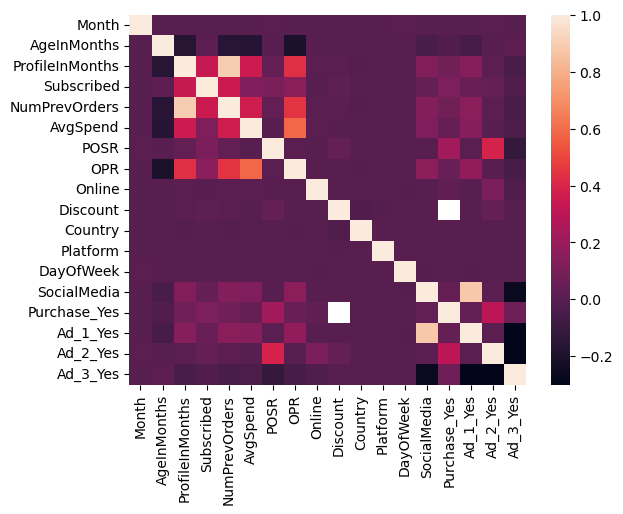

In [23]:
sns.heatmap(X.corr())

#  Game plan time

basic prediction met alle kolomme, doen dan een met van die Sales en Shipping etc gedrop en dan een met die Social Media, Profole in Months gedrop en dan een met n scaler geadd. 
Dan gaan ons accuracy al klaar tot by 88%

Drop Num of profile in months and Social media

<AxesSubplot:>

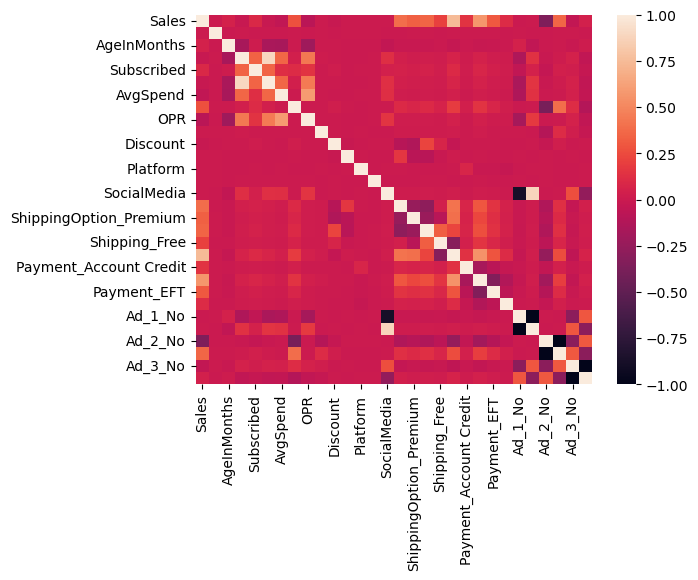

In [31]:
X = data
X.DayOfWeek.replace(('Monday', 'Tuesday' ,'Wednesday','Thursday','Friday','Saturday','Sunday'), (0, 1, 2, 3, 4, 5, 6), inplace=True)
X.Month.replace(('July', 'December', 'January','September','November','March','April','June','February','October', 'May', 'August'), (6, 11, 0, 8, 10, 2, 3, 5, 1, 9, 4, 7), inplace=True)
X.Country.replace(('South Africa', 'England','Japan', 'China', 'Belgium','Ireland','Egypt', 'India','Germany', 'Kenya','Netherlands','United States','Italy','Brazil' ), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), inplace=True)
X.Platform.replace(('Computer', 'iOS', 'Android'), (0, 1, 2), inplace=True)
X.Subscribed.replace(('None', 'Monthly', 'Weekly', 'Daily'), (0, 1, 2, 3), inplace=True)
X.SocialMedia.replace(('None', 'Instagram', 'Facebook', 'Twitter'), (0, 1, 2, 3), inplace=True)
X = pd.get_dummies(X)
y = X['Purchase_Yes']
X = X.drop(['Purchase_Yes', 'Purchase_No'], axis=1)
sns.heatmap(X.corr())


In [32]:
X

,Sales,Month,AgeInMonths,ProfileInMonths,Subscribed,NumPrevOrders,AvgSpend,POSR,OPR,Online,...,Payment_Account Credit,Payment_Credit Card,Payment_EFT,Payment_PayPal,Ad_1_No,Ad_1_Yes,Ad_2_No,Ad_2_Yes,Ad_3_No,Ad_3_Yes
0,519.91,10,450,22,0,32,159.04,1.3,0.60,36,...,0,0,0,1,1,0,1,0,1,0
1,620.48,3,511,29,0,22,358.26,6.5,0.95,68,...,0,0,1,0,1,0,1,0,0,1
2,545.22,6,410,28,0,31,351.28,3.1,0.98,67,...,0,0,1,0,1,0,1,0,0,1
3,438.87,8,451,1,0,9,255.13,2.6,0.77,52,...,0,1,0,0,1,0,1,0,0,1
4,0.00,0,402,7,0,8,262.69,4.8,0.61,25,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,507.73,2,434,20,3,14,252.58,7.4,0.95,55,...,1,0,0,0,0,1,0,1,1,0
149996,465.05,2,404,7,0,9,442.57,3.1,0.85,36,...,0,0,0,1,0,1,1,0,0,1
149997,530.91,5,411,31,1,27,168.55,5.4,0.50,62,...,0,1,0,0,0,1,0,1,0,1
149998,0.00,1,510,16,0,9,339.60,0.8,0.88,42,...,0,0,0,0,1,0,1,0,0,1


In [30]:

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size= 0.2, random_state=24)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11726     0]
 [    0 18274]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     18274

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



# Purchase etc lready implies wheter a purchase has been made so we have to drop all of these values

In [33]:
X = X.drop(['Payment_Account Credit','Payment_Credit Card', 'Payment_EFT','Payment_PayPal', 'Shipping_Free' ], axis=1)

In [36]:
X = X.drop(['ShippingOption_Express', 'ShippingOption_Premium', 'ShippingOption_Standard', 'Shipping_Paid'], axis=1)

<AxesSubplot:>

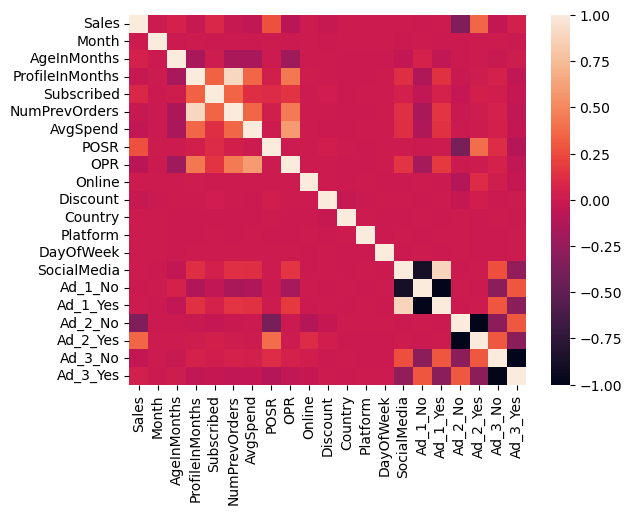

In [40]:
sns.heatmap(X.corr())

In [48]:
Xa_train,Xa_test,ya_train,ya_test=train_test_split(X, y,test_size= 0.9, random_state=24)
knn = KNeighborsClassifier(n_neighbors=600)
knn.fit(Xa_train, ya_train)
y_pred = knn.predict(Xa_test)
print(confusion_matrix(ya_test, y_pred))
print(classification_report(ya_test, y_pred))

[[52648     0]
 [    0 82352]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52648
           1       1.00      1.00      1.00     82352

    accuracy                           1.00    135000
   macro avg       1.00      1.00      1.00    135000
weighted avg       1.00      1.00      1.00    135000



<AxesSubplot:>

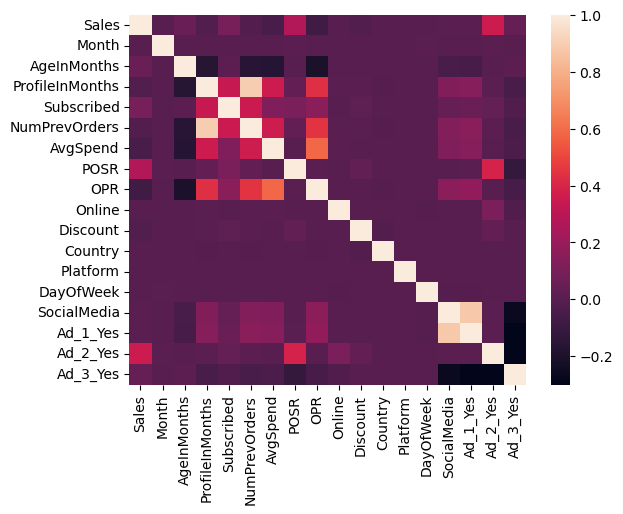

In [42]:
X = X.drop(['Ad_1_No','Ad_2_No','Ad_3_No'], axis=1)
sns.heatmap(X.corr())

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size= 0.2, random_state=24)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11726     0]
 [    0 18274]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     18274

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [52]:
print(y)

0         1
1         1
2         1
3         1
4         0
         ..
149995    1
149996    1
149997    1
149998    0
149999    0
Name: Purchase_Yes, Length: 150000, dtype: uint8

In [45]:

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size= 0.2, random_state=24)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11726     0]
 [    0 18274]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     18274

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [ ]:
y

In [ ]:
b

In [ ]:
steps = [('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size= 0.25, random_state=42)
basic = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
classification_report(y_test, y_pred)